# TASK-6



# IRIS Flower Data Analysis
### By Siddharth Pareek

![alt text](f.jpg "Title")

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="task-6")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddharth2000pareek/task-6" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddharth2000pareek/task-6


'https://jovian.ai/siddharth2000pareek/task-6'

In [4]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [5]:
df=pd.read_csv('Iris.csv')

In [6]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

There are 3 columns on the dimensions of the sepal and using these 3 columns we have to predict the Iris flower species.Right? 

In [42]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Lets draw a scatter-plot for the Sepal dimensions with the species as hue. 

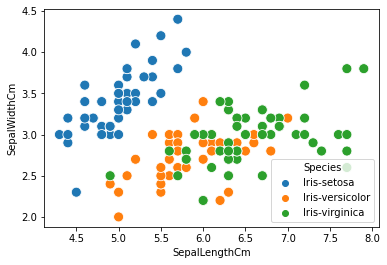

In [46]:
sns.scatterplot(x=df.SepalLengthCm, y=df.SepalWidthCm, hue=df.Species, s=100);

    We can see that the Iris-Setosa have large Sepal width but less Sepal length. On the other hand Versicolor & virginica have higher sepal length but less sepal width.

Lets draw a scatter-plot with Petal dimensions.

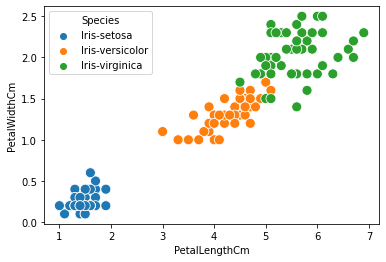

In [47]:
sns.scatterplot(x=df.PetalLengthCm, y=df.PetalWidthCm, hue=df.Species, s=100);

We can clearly see that Setosa have very less Petal width and length but virginica on the other hand have higher petal length as well as width. 

In [7]:
import numpy as np

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_df,val_df=train_test_split(df,test_size=0.33,random_state=42)

In [10]:
train_df.shape

(100, 6)

In [11]:
val_df.shape

(50, 6)

In [12]:
train_df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
96    97            5.7           2.9            4.2           1.3   
105  106            7.6           3.0            6.6           2.1   
66    67            5.6           3.0            4.5           1.5   
0      1            5.1           3.5            1.4           0.2   
122  123            7.7           2.8            6.7           2.0   
..   ...            ...           ...            ...           ...   
71    72            6.1           2.8            4.0           1.3   
106  107            4.9           2.5            4.5           1.7   
14    15            5.8           4.0            1.2           0.2   
92    93            5.8           2.6            4.0           1.2   
102  103            7.1           3.0            5.9           2.1   

             Species  
96   Iris-versicolor  
105   Iris-virginica  
66   Iris-versicolor  
0        Iris-setosa  
122   Iris-virginica  
..               ...  
71   Iris-versicolor  
106   Iris-virginica  
14       Iris-setosa  
92   Iris-versicolor  
102   Iris-virginica  

[100 rows x 6 columns]

In [13]:
input_cols=list(df.columns)[1:-1]

In [14]:
target_col='Species'

In [15]:
input_cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [16]:
train_df[input_cols]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
96             5.7           2.9            4.2           1.3
105            7.6           3.0            6.6           2.1
66             5.6           3.0            4.5           1.5
0              5.1           3.5            1.4           0.2
122            7.7           2.8            6.7           2.0
..             ...           ...            ...           ...
71             6.1           2.8            4.0           1.3
106            4.9           2.5            4.5           1.7
14             5.8           4.0            1.2           0.2
92             5.8           2.6            4.0           1.2
102            7.1           3.0            5.9           2.1

[100 rows x 4 columns]

In [17]:
train_df[target_col]

96     Iris-versicolor
105     Iris-virginica
66     Iris-versicolor
0          Iris-setosa
122     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 100, dtype: object

In [18]:
train_df[input_cols].isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()

In [21]:
scaler.fit(train_df[input_cols])
scaler.fit(val_df[input_cols])

MinMaxScaler()

In [22]:
train_df[input_cols]=scaler.transform(train_df[input_cols])
val_df[input_cols]=scaler.transform(val_df[input_cols])

In [23]:
train_df[input_cols]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
96        0.371429      0.318182       0.542373      0.500000
105       0.914286      0.363636       0.949153      0.833333
66        0.342857      0.363636       0.593220      0.583333
0         0.200000      0.590909       0.067797      0.041667
122       0.942857      0.272727       0.966102      0.791667
..             ...           ...            ...           ...
71        0.485714      0.272727       0.508475      0.500000
106       0.142857      0.136364       0.593220      0.666667
14        0.400000      0.818182       0.033898      0.041667
92        0.400000      0.181818       0.508475      0.458333
102       0.771429      0.363636       0.830508      0.833333

[100 rows x 4 columns]

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
model=DecisionTreeClassifier(random_state=42)
model.fit(train_df[input_cols],train_df[target_col])
train_pred=model.predict(train_df[input_cols])
    
    
    

In [27]:
accuracy_score(train_pred,train_df[target_col])

1.0

In [28]:
val_pred=model.predict(val_df[input_cols])
accuracy_score(val_pred,val_df[target_col])

0.98

In [29]:
val_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [30]:
train_df[target_col]

96     Iris-versicolor
105     Iris-virginica
66     Iris-versicolor
0          Iris-setosa
122     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 100, dtype: object

In [31]:
If=train_df.Species=='Iris-versicolor'
If=If.tolist()
c=0
for i in If:
    if i==True:
        c=c+1

In [32]:
Not=train_df[target_col]=='Iris-versicolor'
Not=Not.tolist()
k=0
for i in Not:
    if i==True:
        k=k+1

In [33]:
c,k

(35, 35)

In [34]:
model.feature_importances_

array([0.01256535, 0.05507159, 0.55087649, 0.38148656])

In [35]:
importance_df=pd.DataFrame({'Feature':train_df[input_cols].columns,'Importance':model.feature_importances_}).sort_values('Feature',ascending=False)

In [36]:
importance_df

Feature  Importance
1   SepalWidthCm    0.055072
0  SepalLengthCm    0.012565
3   PetalWidthCm    0.381487
2  PetalLengthCm    0.550876

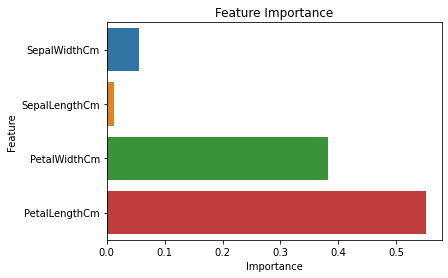

In [38]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='Importance', y='Feature');

In [39]:
def max_d(md):
    model=DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(train_df[input_cols],train_df[target_col])
    model.fit(val_df[input_cols],val_df[target_col])
    x=model.score(train_df[input_cols],train_df[target_col])
    y=model.score(val_df[input_cols],val_df[target_col])
    train_error=1-x
    val_error=1-y
    return {'max_depth':md,'train_error':train_error,'val_error':val_error}
    

In [40]:
error_df=pd.DataFrame([max_d(md) for md in range(1,500)])

In [41]:
error_df

max_depth  train_error  val_error
0            1         0.35        0.3
1            2         0.07        0.0
2            3         0.07        0.0
3            4         0.07        0.0
4            5         0.07        0.0
..         ...          ...        ...
494        495         0.07        0.0
495        496         0.07        0.0
496        497         0.07        0.0
497        498         0.07        0.0
498        499         0.07        0.0

[499 rows x 3 columns]

# THANKYOU :)
